# Lesson 11: 반복관련 기본기능 – zip, enumerate, map, groupby, filter

최규빈  
2023-07-25

<a href="https://colab.research.google.com/github/guebin/IP2023WIN/blob/main/posts/Day2/06_Functions, ControlFlow/2023-01-31-Lesson11.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" style="text-align: left"></a>

# ref

<https://guebin.github.io/DV2022/posts/2022-10-12-6wk-12.html>

# imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# zip

# enumerate

# map ($\star$)

`-` 개념: \$(f,\[x_1,x_2,,x_n\] )=\$

`-` 예제1:

In [2]:
x = [1,2,3] 
f = lambda x: x+1 
y = list(map(f,x))

(다른구현1)

In [3]:
list(map(lambda x: x+1,[1,2,3]))

(다른구현2)

In [4]:
f = lambda x: x+1 
[f(xi) for xi in [1,2,3]]

(다른구현3)

In [5]:
[(lambda x: x+1)(xi) for xi in [1,2,3]]

(다른구현4)–최악

In [6]:
y = [] 
x = [1,2,3] 
f = lambda x: x+1 
for xi in x:
    y.append(f(xi))

In [7]:
y

(다른구현5)–더 최악

In [8]:
y = [] 
x = [1,2,3] 
f = lambda x: x+1 
for i in range(len(x)):
    y.append(f(x[i]))

In [9]:
y

**Quiz**

$x=[1,2,3,4,5]$에 대하여 $x^2$을 수행하는 함수를 구현하라.

`-` 예제2: 문자열을 입력으로 받고 대문자이면 True, 소문자이면 False

    입력: A,B,C,a,b,c
    출력: T,T,T,F,F,F

In [10]:
x= list('ABCabc')
# x = ['A','B','C','a','b','c']
f = lambda s: s.isupper()
y = list(map(f,x))

In [11]:
x,y

`-` 예제3: 두개의 입력을 받는 함수 (map을 이용하는 것이 리스트
컴프리헨션보다 조금 편한것 같다)

In [23]:
list(map(lambda x,y: x+y, [1,2,3],[-1,-2,-3]))

(다른구현)– 리스트컴프리헨션

In [13]:
f = lambda x,y: x+y 
[f(x,y) for x,y in zip([1,2,3],[-1,-2,-3])] 

**quiz**

In [14]:
t=np.linspace(-3.14,3.14,100)
x=np.sin(t)
y=np.cos(t)

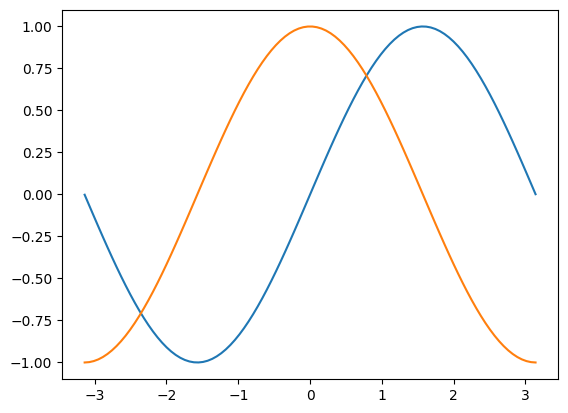

In [15]:
plt.plot(t,x)
plt.plot(t,y)

$f(x,y) = \max(x,y)$ 를 구현하여 ${\bf x}$,${\bf y}$ 각 원소에 적용하고
결과를 시각화 하라.

In [16]:
f = (lambda x,y: max(x,y))
f(3,4)

In [17]:
z= list(map(f,x,y))

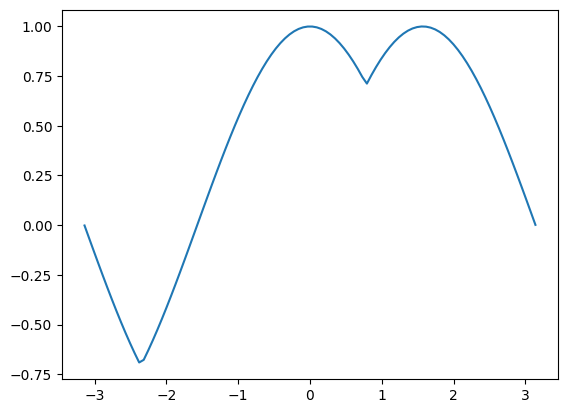

In [18]:
plt.plot(t,z)

`-` 예제4: map은 “하나의 함수에 다양한 입력”을 적용하는 경우에만
사용가능, 리스트컴프리헨션은 “다양한 함수에 다양한 입력” 지원

In [19]:
flst = [lambda x: x+1, lambda x: x+2, lambda x:x+3] 

map으로 구현시도 $\to$ 실패

In [20]:
list(map(flst,[-1,-2,-3])) # 결과가 0,0,0

리스트컴프리헨션으로 구현시도 $\to$ 성공

In [21]:
[f(x) for f,x in zip(flst,[-1,-2,-3])]

`-` 종합: map과 리스트컴프리헨션과 비교

-   map은 for문을 위한 $i$등의 인덱스를 쓰지 않지만 리스트컴프리헨션은
    필요함
-   map은 좀더 리스트컴프리헨션보다 제약적으로 사용할 수 밖에 없음.

# 판다스: groupby

## flights data

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/PacktPublishing/Pandas-Cookbook/master/data/flights.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58492 entries, 0 to 58491
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   MONTH      58492 non-null  int64  
 1   DAY        58492 non-null  int64  
 2   WEEKDAY    58492 non-null  int64  
 3   AIRLINE    58492 non-null  object 
 4   ORG_AIR    58492 non-null  object 
 5   DEST_AIR   58492 non-null  object 
 6   SCHED_DEP  58492 non-null  int64  
 7   DEP_DELAY  57659 non-null  float64
 8   AIR_TIME   57474 non-null  float64
 9   DIST       58492 non-null  int64  
 10  SCHED_ARR  58492 non-null  int64  
 11  ARR_DELAY  57474 non-null  float64
 12  DIVERTED   58492 non-null  int64  
 13  CANCELLED  58492 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 6.2+ MB

## get_groups

`-` groupby - 데이터프레임을 여러개의 서브데이터프레임으로 나누는 기술 -
단독으로 쓸 이유는 별로 없다. $\to$ 그룹을 나누고 each 그룹마다 어떠한
“변수”에 “연산”을 하기 위함.

In [20]:
df.groupby(by="AIRLINE")

-   지금 이것이 항공사별로 데이터프레임이 나누어진 상태임

`-` 진짜 sub dataframe 으로 나누어져 있는지 확인

In [21]:
grouped = df.groupby(by="AIRLINE")
grouped.groups.keys()

In [54]:
display(grouped.get_group('AS'))

In [24]:
grouped.groups.keys()

In [26]:
#collapse_output
for key in grouped.groups.keys():
    display(grouped.get_group(key))

## 범주형변수를 기준으로 groupby -\> agg

In [33]:
df.columns

In [37]:
grouped.get_group('AA').ARR_DELAY.mean(),grouped.get_group('WN').ARR_DELAY.mean()

### `#` EX1: \[AIRLINE\] $\to$ {ARR_DELAY:mean}

`-` 방법1: grouby() $\to$ .agg({colname: function})

(예시1)

In [43]:
df.groupby(by="AIRLINE").agg({'ARR_DELAY':np.mean})

(예시2)

In [57]:
df.groupby(by="AIRLINE").agg({'ARR_DELAY':'mean'})

`-` 방법2: grouby() $\to$ key로 column선택 $\to$ .agg(f) or .f()

(예시1)

In [49]:
df.groupby(by='AIRLINE')['ARR_DELAY'].agg(np.mean)

(예시2)

In [59]:
df.groupby(by='AIRLINE')['ARR_DELAY'].agg("mean")

(예시3)

In [60]:
df.groupby(by='AIRLINE')['ARR_DELAY'].mean()

### `#` EX2: \[AIRLINE,WEEKDAY\] $\to$ {CANCELLED:sum}

`-` 방법1

(예시1)

In [61]:
df.groupby(by=["AIRLINE","WEEKDAY"]).agg({"CANCELLED":np.sum})

(예시2)

In [62]:
df.groupby(by=["AIRLINE","WEEKDAY"]).agg({"CANCELLED":"sum"})

`-` 방법2

(예시1)

In [63]:
df.groupby(by=["AIRLINE","WEEKDAY"])[["CANCELLED"]].agg(np.sum)

(예시2)

In [64]:
df.groupby(by=["AIRLINE","WEEKDAY"])["CANCELLED"].agg("sum")

(예시3)

In [65]:
df.groupby(by=["AIRLINE","WEEKDAY"])["CANCELLED"].sum()

In [66]:
df.DIVERTED

### `#` EX3: \[AIRLINE,WEEKDAY\] $\to$ {CANCELLED:sum,mean}, {DIVERTED: sum,mean}

`-` 방법1

(예시1)

In [67]:
df.groupby(["AIRLINE","WEEKDAY"])\
.agg({"CANCELLED":[np.sum,np.mean],"DIVERTED":[np.sum,np.mean]})

(예시2)

In [68]:
df.groupby(["AIRLINE","WEEKDAY"])\
.agg({"CANCELLED":["sum","mean"],"DIVERTED":["sum","mean"]})

`-` 방법2

(예시1)

In [69]:
df.groupby(["AIRLINE","WEEKDAY"])[["CANCELLED","DIVERTED"]]\
.agg([np.sum,np.mean])

(예시2)

In [70]:
df.groupby(["AIRLINE","WEEKDAY"])[["CANCELLED","DIVERTED"]]\
.agg(["sum","mean"])

(예시3) – 사용불가능

### `#` EX4: \[AIRLINE,WEEKDAY\] $\to$ {CANCELLED:sum,mean,count}, {AIR_TIME: mean,var}

`-` 방법1

(예시1)

In [71]:
df.groupby(["AIRLINE","WEEKDAY"])\
.agg({'CANCELLED':[np.sum,np.mean,len],'AIR_TIME':[np.mean,np.var]})

(예시2)

In [72]:
df.groupby(["AIRLINE","WEEKDAY"])\
.agg({'CANCELLED':["sum","mean","count"],'AIR_TIME':["mean","var"]})

(사용자정의함수)

In [73]:
df.groupby(["AIRLINE","WEEKDAY"])\
.agg({'CANCELLED':[np.sum,np.mean,len],
      'AIR_TIME':[np.mean,lambda x: np.std(x,ddof=1)**2]})

## 연속형변수를 기준으로 groupby -\> agg

In [74]:
df.T

In [75]:
df.DIST.describe()

In [76]:
df.assign(DIST2 = pd.cut(df.DIST,[-np.inf,391,690,1199,np.inf]))\
.groupby(["AIRLINE","DIST2"]).agg({'CANCELLED':["sum","mean","count"]})

In [77]:
pd.cut(df.DIST,[-np.inf,400,700,1200,np.inf],labels=['~400','400~700','700~1200','1200~'])

In [78]:
df.assign(DIST2 = pd.cut(df.DIST,[-np.inf,400,700,1200,np.inf],labels=['~400','400~700','700~1200','1200~']))\
.groupby(["AIRLINE","DIST2"]).agg({'CANCELLED':["sum","mean","count"]})

## HRDataset_v14 자료분석

아래의 코드를 활용하여 Kaggle의
[HRdataset](https://www.kaggle.com/datasets/rhuebner/human-resources-data-set)을
불러오라.

In [50]:
df = pd.read_csv('https://raw.githubusercontent.com/guebin/DV2022/master/posts/HRDataset_v14.csv')
df

In [53]:
df.groupby('RaceDesc')

데이터를 조사하고 올바르게 분석한 사람을 모두 고르라. (모두 맞칠경우만
정답으로 인정)

-   소윤: 근무인원수가 가장 많은 인종(RaceDesc)은 ’White’이며 이는
    ’Asian’인종과 ’Black or African American’의 합보다 많다.
-   다호: ’RaceDesc==White’의 성별(Sex)임금차이는 2000이상이다.
-   하니: 퇴직한사람(Termd==1)은 모두 104명이며 백인여성의 퇴직자수가
    가장 많다.
-   도한: 퇴직한사람중 아시아인의 비율은 10%가 넘지 않는다.

(풀이)

모두 참이다.

**데이터조사**

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non

-   EmpID가 missing이 없는 열임

***소윤: 근무인원수가 가장 많은 인종(RaceDesc)은 ’White’이며 이는
’Asian’인종과 ’Black or African American’의 합보다 많다. — 참***

In [79]:
df.groupby(by='RaceDesc').agg({'EmpID':len})

In [80]:
29+80

***다호: ’RaceDesc==White’의 성별(Sex)임금차이는 2000이상이다. — 참***

In [81]:
df.groupby(by=['RaceDesc','Sex']).agg({'Salary':np.mean})

In [82]:
68846.519231 - 65334.132530

***하니: 퇴직한사람(Termd==1)은 모두 104명이며 백인여성의 퇴직자수가
가장 많다. — 참***

In [83]:
(df.Termd==1).sum()

In [84]:
df.groupby(by=['RaceDesc','Sex']).agg({'Termd':np.sum})

***도한: 퇴직한사람중 아시아인의 비율은 10%가 넘지 않는다. — 참***

In [85]:
(df.Termd==1).sum()

In [86]:
df.groupby(by=['RaceDesc']).agg({'Termd':np.sum})

# Quiz

다음과 같은 데이터프레임을 불러온 뒤 물음에 답하라

In [518]:
df=pd.read_csv('https://raw.githubusercontent.com/guebin/DV2022/master/_notebooks/dv2022.csv')
df

`(1)` 기말고사 성적이 중간고사 성적보다 향상된 학생들을 출력하라. 즉 mid
\< fin 인 학생들을 출력하라. (다양한 방법으로 연습할 것, 제출은 한 가지
방법으로 구현해도 감점없음)

In [521]:
# 구현결과가 아래와 같아야 한다. 

`(2)` 기말고사 성적이 중간고사 성적보다 향상된 학생들의 출석과 레포트
점수를 출력하라.

In [523]:
# 구현결과가 아래와 같아야 한다. 

In [64]:
df = pd.DataFrame({'a':[1,2,3,4],'b':[2,3,4,5],'c':[3,4,5,6],'d':[4,5,6,7]})
df

## `2`.

아래의 결과를 관찰하고 drop의 기능을 유추하라.

(예시1)

In [65]:
df.drop(columns='a')

(예시2)

In [66]:
df.drop(columns=['a','b'])

(예시3)

In [67]:
df.drop(index=0)

(예시4)

In [71]:
df.drop(index=range(2,4))

문제: `df` 에서 a,c열을 삭제하고 첫행을 삭제하라.

In [78]:
#출력결과는 아래와 같아야 한다. 